In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
from Training.path_constants import ORIG_DATA_PATH, Marmot_data
from Preprocessing.preprocessing_utilities import create_element_mask, get_table_bounding_box, get_column_bounding_box

In [2]:
positive_data = glob.glob(f'{ORIG_DATA_PATH}/Positive/Raw' + '/*.bmp')
negative_data = glob.glob(f'{ORIG_DATA_PATH}/Negative/Raw' + '/*.bmp')

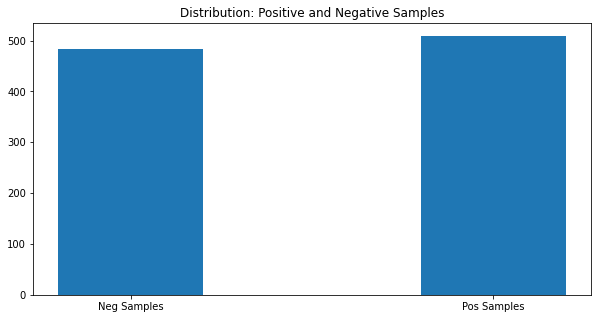

In [3]:
fig = plt.figure(figsize = (10, 5))
x = ['Neg Samples', 'Pos Samples']
y = [len(negative_data), len(positive_data)]
plt.bar(x, y,width = 0.4)
plt.title('Distribution: Positive and Negative Samples')
plt.show()

In [4]:
new_h, new_w = 1024, 1024

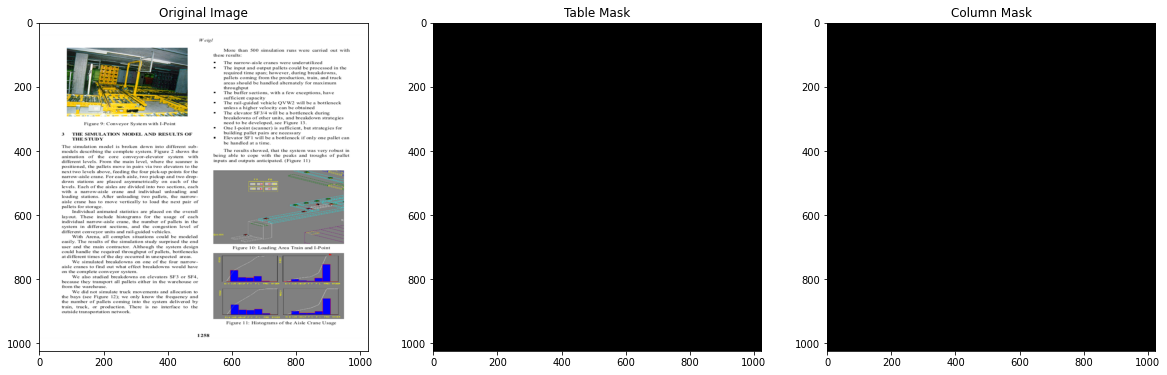

In [5]:
from PIL import Image
# Negative Example
image_path = f'{ORIG_DATA_PATH}/Negative/Raw/10.1.1.1.2000_4.bmp'
image = Image.open(image_path)
image = image.resize((new_h, new_w))
table_mask = create_element_mask(new_h, new_w)
column_mask = create_element_mask(new_h, new_w)
# Ploting
f, ax = plt.subplots(1,3, figsize = (20,15))
ax[0].imshow(np.array(image))
ax[0].set_title('Original Image')
ax[1].imshow(table_mask)
ax[1].set_title('Table Mask')
ax[2].imshow(column_mask)
ax[2].set_title('Column Mask')
plt.show()

In [6]:
# Positive Example
image_path = f'{ORIG_DATA_PATH}/Positive/Raw/10.1.1.1.2006_3.bmp'
table_xml_path = f'{ORIG_DATA_PATH}/Positive/Labeled/10.1.1.1.2006_3.xml'
column_xml_path = f'{Marmot_data}/10.1.1.1.2006_3.xml'
# Load image
image = Image.open(image_path)
# Resize imageto std 1024, 1024
w, h = image.size
image = image.resize((new_h, new_w))
# Convert to 3 channel image if 1 channel
if image.mode != 'RGB':
    image = image.convert("RGB")
# Scaled versions of bbox coordinates of table
table_bounding_boxes = get_table_bounding_box(table_xml_path, (new_h, new_w))
# Scaled versions of bbox coordinates of columns
column_bounding_boxes, table_bounding_boxes = get_column_bounding_box(column_xml_path, (h,w), (new_h, new_w), table_bounding_boxes)

In [7]:
column_bounding_boxes, table_bounding_boxes

([[591, 647, 668, 716],
  [686, 647, 733, 714],
  [753, 649, 799, 716],
  [823, 649, 865, 715]],
 [[585, 649, 878, 715]])

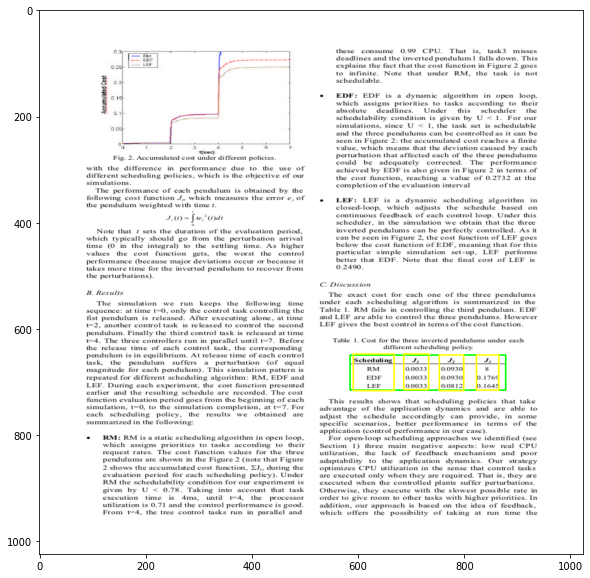

In [8]:
plt.figure(figsize = (20,10))
image_copy = np.array(image).copy()
for bounding_box in table_bounding_boxes:
    cv2.rectangle(image_copy, (bounding_box[0], bounding_box[1]), (bounding_box[2], bounding_box[3]), (0, 255, 0), 2)
for bounding_box in column_bounding_boxes:
    cv2.rectangle(image_copy, (bounding_box[0], bounding_box[1]), (bounding_box[2], bounding_box[3]), (255, 255, 0), 2)
plt.imshow(image_copy)

In [9]:
table_mask = create_element_mask(new_h, new_w, table_bounding_boxes)
column_mask = create_element_mask(new_h, new_w, column_bounding_boxes)

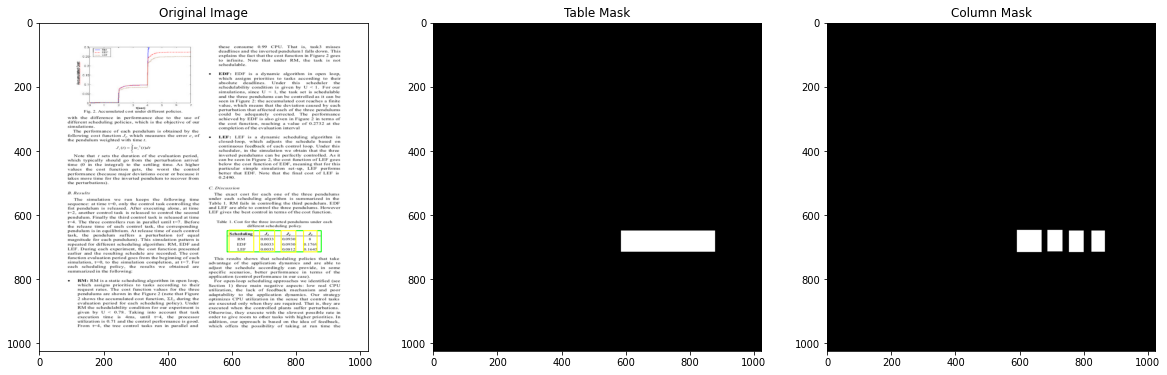

In [10]:
f, ax = plt.subplots(1,3, figsize = (20,15))
ax[0].imshow(np.array(image_copy))
ax[0].set_title('Original Image')
ax[1].imshow(table_mask)
ax[1].set_title('Table Mask')
ax[2].imshow(column_mask)
ax[2].set_title('Column Mask')
plt.show()